In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Identités de genre - genderid

- 0, Man
- 1, woman
- 2, indigenous or other cultural identity (ex: two spirit)
- 3, non binary, genderqueer, agender or a similar identity

## Stratégies de coopération (WCC)

##### WCC = 43-item Ways of Coping Checklist (Vitaliano, 1985) 
It Measures coping strategies in reference to stressful situations using a 4-point Likert scale ranging from 1 (“not used”) to 4 (“used a great deal”). In the current study, participants will provide behaviors enacted for situations in the current COVID-19 crisis.

Five sub-scales are extracted :

- WCCP = Problem Focused Coping - Total
- WCC_SS = Seeking Social Support Coping - Total
- WCC_B = Blamed Self Coping - Total
- WCC_W = Wishful Thinking Coping - Total
- WCC_A = Avoidance Coping - Total

## Mesures de résilience (ARM)

Resilience here refers to the dynamic process that promotes positive adaptation or wellness among individuals exposed to adversity (Cicchetti & Garmezy, 1993; Luthar, Cicchetti, & Becker, 2000; Masten, Best, & Garmezy, 1990; Rutter, 2012)

##### The Adult Resilience Measure-Revised (ARM-R) 
It is a 17-item questionnaire assessing resilience in adults. Its items are scored on a 5-point Likert scale ranging from 1 (not at all) to 5 (a lot). 
Total score: Total sum scores are calculated, with a possible range from 28 to 140.

In addition to an overall resilience score (ARM_Total), the 17-item versions of the ARM-R, scores for two subscales can be derived. 
They are for: Personal resilience, and Relational (ARM-R) resilience
 
- ARM_Total = Adult Resilience - Total
- ARM_P Adult Resilience - Personal
Personal resilience includes intrapersonal and interpersonal items. These are linked, as both dimensions depend on individuals’ social ecologies to reinforce their resilience.

- ARM_R = Adult Resilience - Relational
Relational resilience relates to characteristics associated with the important relationships shared with either a primary caregiver or a partner or family


In [2]:
#crée le dataframe 
df = pd.read_csv('JulieDandrimont_données_psy3019-H23_20230212_Pandemic.csv')

#colonnes 
df = df.replace(' ', np.nan)



In [3]:

#df #= df.dropna()
df = df.iloc[:,2:23]
colonnes = df.columns.tolist()
df = df.dropna()
df.head(3)

,id,date,timepandemic,age,raceD,canada,provinceCA,sex,genderid,genderD,...,LGBTQ,LGBT_Subgroup,ARM_P,ARM_R,ARM_Total,WCC_P,WCC_SS,WCC_B,WCC_W,WCC_A
0,1,7/21/2020 16:37:33,130,28,1,1,11,1,1,0,...,1,3,47,33,80,18,10,3,8,10
1,2,7/21/2020 17:13:22,130,30,0,1,9,1,1,0,...,0,0,41,25,66,36,16,3,10,11
2,3,7/21/2020 17:26:48,130,32,1,1,11,1,1,0,...,0,0,33,24,57,17,10,3,14,16


In [4]:
print(df.isnull().sum())

id                 0
date               0
timepandemic       0
age                0
raceD              0
canada             0
provinceCA         0
sex                0
genderid           0
genderD            0
SexOrientationR    0
LGBTQ              0
LGBT_Subgroup      0
ARM_P              0
ARM_R              0
ARM_Total          0
WCC_P              0
WCC_SS             0
WCC_B              0
WCC_W              0
WCC_A              0
dtype: int64


In [5]:
#sample = df.sample(n=100 ) #,random_state=42
sample = df.groupby('genderid').apply(lambda x: x.sample(frac=0.05))

# Redéfinir les index des lignes de l'échantillon
sample = sample.reset_index(drop=True)

In [6]:
x = sample.iloc[:,16:21].values
y = sample['genderid'].values

feature_dict = {i:label for i,label in zip(
                range(5),
                  ('WCC_P',
                  'WCC_SS',
                  'WCC_B',
                  'WCC_W', 
                  'WCC_A',))}

label_dict = {1: 'Man', 2: 'Woman', 3:'Other cultural Id', 4:'Non Binary'}

In [7]:
df = df.drop('date', axis=1) # on utilise pas la date pour les analyses
print(df.dtypes)

id                  int64
timepandemic        int64
age                object
raceD              object
canada             object
provinceCA         object
sex                object
genderid           object
genderD            object
SexOrientationR    object
LGBTQ              object
LGBT_Subgroup      object
ARM_P              object
ARM_R              object
ARM_Total          object
WCC_P              object
WCC_SS             object
WCC_B              object
WCC_W              object
WCC_A              object
dtype: object


In [8]:
# nettoyer les colonnes object
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['ARM_P'] = pd.to_numeric(df['ARM_P'], errors='coerce')
df['ARM_R'] = pd.to_numeric(df['ARM_R'], errors='coerce')
df['ARM_Total'] = pd.to_numeric(df['ARM_Total'], errors='coerce')
df['WCC_P'] = pd.to_numeric(df['WCC_P'], errors='coerce')
df['WCC_SS'] = pd.to_numeric(df['WCC_SS'], errors='coerce')
df['WCC_B'] = pd.to_numeric(df['WCC_B'], errors='coerce')
df['WCC_W'] = pd.to_numeric(df['WCC_W'], errors='coerce')
df['WCC_A'] = pd.to_numeric(df['WCC_A'], errors='coerce')

# convertir les colonnes object en float
df['age'] = df['age'].astype(float)
df['ARM_P'] = df['ARM_P'].astype(float)
df['ARM_R'] = df['ARM_R'].astype(float)
df['ARM_Total'] = df['ARM_Total'].astype(float)
df['WCC_P'] = df['WCC_P'].astype(float)
df['WCC_SS'] = df['WCC_SS'].astype(float)
df['WCC_B'] = df['WCC_B'].astype(float)
df['WCC_W'] = df['WCC_W'].astype(float)
df['WCC_A'] = df['WCC_A'].astype(float)

# convertir les colonnes object en int
df['age'] = df['age'].astype(int)
df['genderid'] = pd.to_numeric(df['genderid'], errors='coerce').astype(int)
df['genderD'] = pd.to_numeric(df['genderD'], errors='coerce').astype(int)
df['SexOrientationR'] = pd.to_numeric(df['SexOrientationR'], errors='coerce').astype(int)
df['raceD'] = df['raceD'].astype(int)
df['canada'] = df['canada'].astype(int)
df['provinceCA'] = df['provinceCA'].astype(int)
df['sex'] = df['sex'].astype(int)
df['genderid'] = df['genderid'].astype(int)
df['genderD'] = df['genderD'].astype(int)
df['SexOrientationR'] = df['SexOrientationR'].astype(int)
df['LGBTQ'] = df['LGBTQ'].astype(int)
df['LGBT_Subgroup'] = df['LGBT_Subgroup'].astype(int)

In [11]:

def log_n(x):
    if x <= 1:
        return 0
    else:
        return 1 + log_n(x/math.e)
    
def algo_tri(T):
    n = len(T)
    for i in range(n-1):
        min_index = i
        for j in range(i+1, n):
            if T[j] < T[min_index]:
                min_index = j
        T[i], T[min_index] = T[min_index], T[i]
    return T



# LDA

Linear Discriminant Analysis : LDA est une technique d'analyse discriminante qui permet de trouver une combinaison linéaire de variables qui permet de séparer deux ou plusieurs groupes de données. Cette technique est souvent utilisée pour la classification et la reconnaissance de formes.

In [8]:
df.columns

Index(['id', 'timepandemic', 'age', 'raceD', 'canada', 'provinceCA', 'sex',
       'genderid', 'genderD', 'SexOrientationR', 'LGBTQ', 'LGBT_Subgroup',
       'ARM_P', 'ARM_R', 'ARM_Total', 'WCC_P', 'WCC_SS', 'WCC_B', 'WCC_W',
       'WCC_A'],
      dtype='object')

In [9]:
def lda_plot(lda, X, y):
    # transformer les données en utilisant le modèle LDA
    X_lda = lda.transform(X)
    
    # créer un dataframe avec les composantes LDA et la classe cible
    lda_df = pd.DataFrame(X_lda, columns=['lda_1'])
    lda_df['target'] = y
    
    # tracer un graphique en utilisant seaborn
    sns.scatterplot(x='lda_1', y='target', data=lda_df)
    plt.title('Analyse LDA')
    plt.show()

def lda_analysis(df, target_col):
    # séparer les données en features et target
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # ajuster le modèle LDA sur les données d'entraînement
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    # prédire les valeurs de la classe sur les données de test
    y_pred = lda.predict(X_test)
    
    # calculer la précision du modèle sur les données de test
    accuracy = accuracy_score(y_test, y_pred)
    print("Précision du modèle : {:.2f}%".format(accuracy*100))
    lda_plot(lda, X, y)
    # retourner le modèle LDA ajusté
    return lda


Précision du modèle : 97.46%


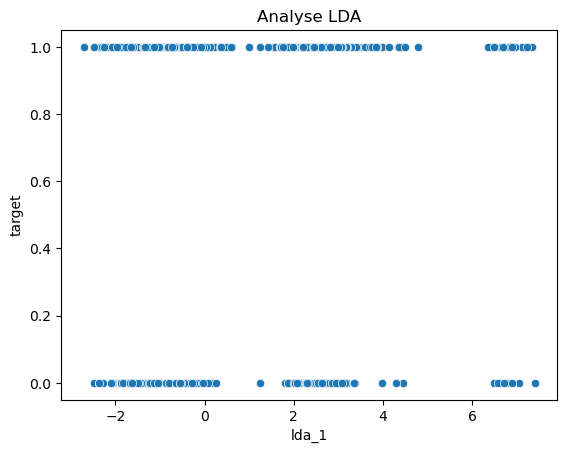

In [10]:
# effectuer une analyse LDA sur les données
lda = lda_analysis(df, 'sex')

# SVM implémenté (2 %)


Précision : 0.73


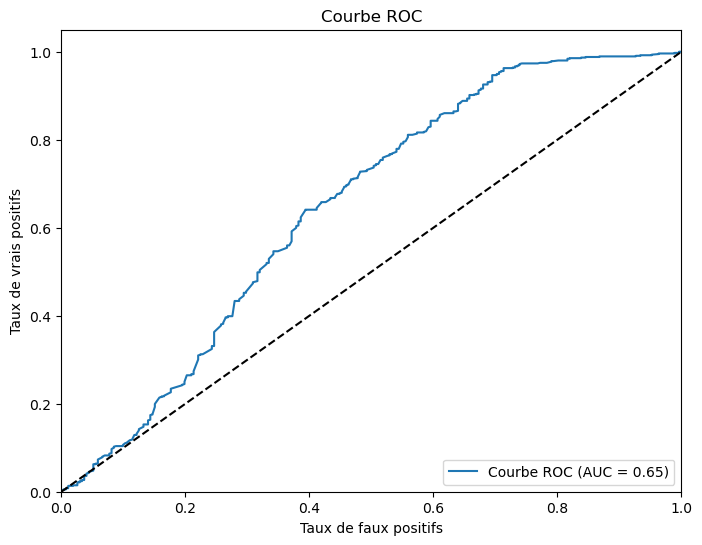

In [16]:
# Sélectionner les colonnes d'intérêt
X = df[['age','raceD', 'canada', 'provinceCA', 'SexOrientationR', 'LGBTQ', 'LGBT_Subgroup']]
y = df['sex']

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle SVM
clf = SVC(kernel='linear', C=1, probability=True)
clf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Précision : {:.2f}'.format(accuracy))

# Tracer la courbe ROC
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


# KNN implémenté (2 %) 


In [12]:
def knn_classification(df, k=5):
    # Séparer les données d'entraînement et de test
    X = df.drop('LGBTQ', axis=1)
    y = df['LGBTQ']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Instancier le classifieur KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Former le modèle sur les données d'entraînement
    knn.fit(X_train, y_train)
    
    # Prédire les classes pour les données de test
    y_pred = knn.predict(X_test)
    
    # Calculer la précision
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Précision : {:.2f}%".format(accuracy * 100))

In [13]:
def knn_graph(df, max_k=10):
    # Séparer les données d'entraînement et de test
    X = df.drop('LGBTQ', axis=1)
    y = df['LGBTQ']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Calculer la précision pour différents nombres de voisins
    accuracies = []
    for k in range(1, max_k+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    # Tracer le graphique
    plt.plot(np.arange(1, max_k+1), accuracies)
    plt.title("Précision en fonction du nombre de voisins")
    plt.xlabel("Nombre de voisins")
    plt.ylabel("Précision")
    plt.show()

In [14]:
knn_classification(df, k=5)

Précision : 80.37%


C:\Users\latte.MILLENIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\latte.MILLENIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\latte.MILLENIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

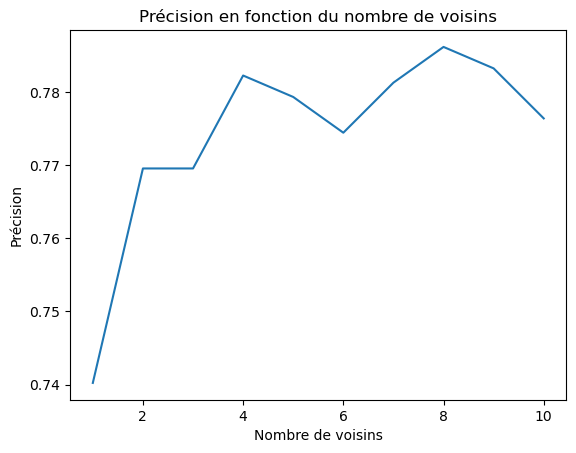

In [15]:
knn_graph(df, max_k=10)

RF implémenté (2 %)


In [17]:
def train_random_forest(df):
    # On divise les données en ensembles d'entraînement et de test
    X = df.drop('LGBTQ', axis=1)  # On enlève la variable cible 'LGBTQ'
    y = df['LGBTQ']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # On entraîne le modèle de Forêts Aléatoires
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # On fait des prédictions sur l'ensemble de test et on calcule la précision du modèle
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # On affiche la matrice de confusion pour évaluer les performances du modèle
    cm = confusion_matrix(y_test, y_pred)
    print("Matrice de confusion :")
    print(cm)

    # On retourne le modèle entraîné et la précision obtenue
    return rf_model, accuracy

In [18]:
def plot_feature_importances(model, df):
    # On calcule l'importance de chaque variable dans le modèle
    feature_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])

    # On trie les variables par ordre décroissant d'importance
    feature_importances = feature_importances.sort_values(ascending=False)

    # On affiche un graphique des 20 variables les plus importantes
    feature_importances.head(20).plot(kind='barh')
    plt.title("Importance des variables dans le modèle de Forêts Aléatoires")
    plt.xlabel("Importance")
    plt.ylabel("Variable")
    plt.show()

In [19]:
model, precision = train_random_forest(df)
model
precision

Matrice de confusion :
[[1112    0]
 [   1  423]]


0.9993489583333334

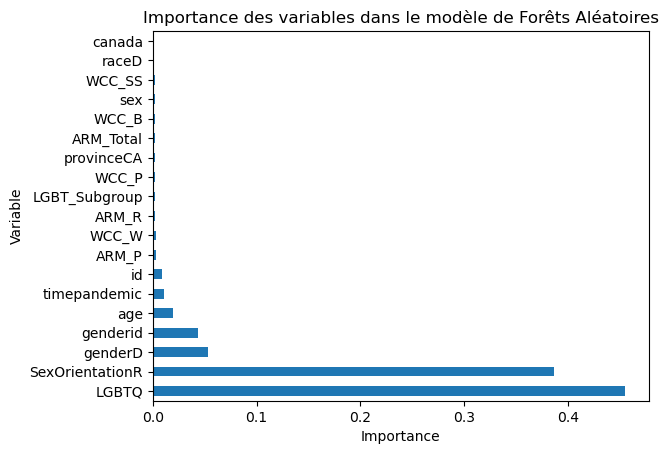

In [20]:
plot_feature_importances(model, df)

# PCA implémenté (2 %)

In [21]:
def pca_analysis(dataframe):
    # Sélection des colonnes à inclure dans l'analyse
    df = dataframe[['age', 'raceD', 'canada', 'provinceCA', 'sex', 'genderid', 'genderD', 'SexOrientationR', 'LGBTQ', 'LGBT_Subgroup', 'ARM_P', 'ARM_R', 'ARM_Total', 'WCC_P', 'WCC_SS', 'WCC_B', 'WCC_W', 'WCC_A']]
    
    # Standardisation des données
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)
    
    # Réduction de la dimensionnalité
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_df)
    
    # Création d'un DataFrame contenant les composantes principales
    principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
    
    # Calcule de la variance expliquée par chaque composante
    explained_variance = pca.explained_variance_ratio_
    
    # Calcule de la précision totale du modèle
    total_variance = np.sum(explained_variance)
    
    # Affichage des informations sur le modèle
    print("Variance expliquée par PC1 : {:.2f}%".format(explained_variance[0]*100))
    print("Variance expliquée par PC2 : {:.2f}%".format(explained_variance[1]*100))
    print("Précision totale du modèle : {:.2f}%".format(total_variance*100))
    
    return principal_df

In [22]:
def plot_pca(principal_df):
    # Tracé des composantes principales
    sns.scatterplot(x="PC1", y="PC2", data=principal_df)

Variance expliquée par PC1 : 21.47%
Variance expliquée par PC2 : 16.29%
Précision totale du modèle : 37.76%


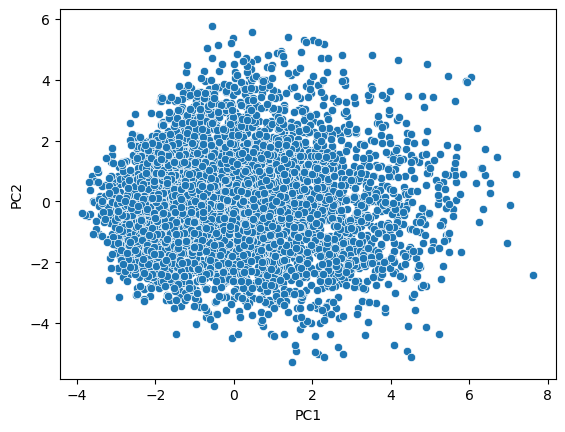

In [23]:
# Analyse PCA
principal_df = pca_analysis(df)

# Tracé du graphique
plot_pca(principal_df)